# PREPARE DATASET

In [1]:
#!pip3 install opencv-python

In [2]:
import os
import cv2
import json
from tqdm import tqdm
import traceback
import shutil
import statistics

In [3]:
def json2rect(path):
    rects = []
    with open(path, encoding="utf-8") as file:
        data = json.load(file)
    for shape in data['shapes']:
        label = shape['label']
        rect = []
        for point in shape['points']:
            x, y = point
            rect.append(int(x))
            rect.append(int(y))
        if rect[0]>rect[2]:
            rect[0], rect[2] = rect[2], rect[0]
        if rect[1]>rect[3]:
            rect[1], rect[3] = rect[3], rect[1]
        rects.append((rect, label))
    return rects

def img2crops(image, rects):
    crops = []
    try:
        for rect in rects:
            (rect, label) = rect
            part = image[rect[1]:rect[3], rect[0]:rect[2]]
            crops.append((part, label))
        return crops
    except Exception as e:
        traceback.print_exc()
        print(rect)

def savecrops(crops, save_path, basename):
    for index,crop in enumerate(crops):
        try:
            img, label = crop
            filename = str(index) + "_" + basename
            os.makedirs(os.path.join(save_path, label), exist_ok=True)
            filename = os.path.join(save_path, label, filename)
            cv2.imwrite(filename, img)
        except Exception as e:
            traceback.print_exc()
            print(filename)

In [4]:
base_path = r"D:\magistracy\6-2\HelmetProtection\HelmetProtection"
save_path = r"D:\magistracy\6-2\HelmetProtection\dataset"  

In [5]:
all_rect = []
for folder in os.listdir(base_path):
    for file in tqdm(os.listdir(os.path.join(base_path, folder))):
        if not file.endswith(".json"):
            try:
                rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
                all_rect.append(rects)
                img = cv2.imread(os.path.join(base_path, folder, file))
                crops = img2crops(img, rects)
                savecrops(crops, save_path, file)
            #print(file)
            except Exception as e:
                print(file)
                traceback.print_exc()

 49%|███████████████████████████████████████                                         | 157/322 [00:03<00:03, 51.05it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    data = json.load(file)
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "C:\Users\User\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 553: invalid continuation byte


24.04.19_Джили_выездное__Колос_005.JPG


 83%|██████████████████████████████████████████████████████████████████▎             | 267/322 [00:05<00:01, 46.80it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    data = json.load(file)
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "C:\Users\User\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 551: invalid continuation byte
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    

6164 Замер диаметра тройника Ду300мм.jpg
6182 Расточка патрубка на ДИП500.jpg


  8%|██████▏                                                                          | 23/302 [00:00<00:02, 96.63it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part2\\20151106125007000000611_remont_skvajin-3json.json'
 14%|██████████▊                                                                     | 41/302 [00:00<00:02, 129.70it/s]

20151106125007000000611_remont_skvajin-3jpg.jpg


 96%|█████████████████████████████████████████████████████████████████████████████   | 291/302 [00:07<00:00, 38.19it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    data = json.load(file)
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "C:\Users\User\anaconda3\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "C:\Users\User\anaconda3\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 35 column 16 (char 471)
Traceback (most recent call last):


ıtugae-atolye-(2).jpg
вахтовики.jpg
роснефть (146 из 207).jpg


  1%|▍                                                                               | 19/3734 [00:00<01:37, 38.05it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
  1%|▌                                                                               | 29/3734 [00:00<01:09, 53.66it/s]

[431, 56, 670, 292]
-СЌС‚Р°-e1565174766417.jpg


  3%|██▏                                                                            | 103/3734 [00:03<01:29, 40.50it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
  3%|██▍                                                                            | 117/3734 [00:03<01:12, 49.79it/s]

[698, 131, 768, 216]
04-05_ZAVOD_-NFCC_РћР»РµРі-РЇРєРѕРІР»РµРІ.jpg


  6%|████▌                                                                          | 215/3734 [00:05<00:58, 60.54it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    data = json.load(file)
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "C:\Users\User\anaconda3\lib\json\__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "C:\Users\User\anaconda3\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "C:\Users\User\anaconda3\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 52 column 16 (char 834)
  6%|████▊                         

1.гѓ­гѓњгѓѓгѓ€гЃ®з§»е‹•пј€й«ењ§ж°ґг‚ёг‚§гѓѓгѓ€г‚їг‚¤гѓ—пј‰.jpg


  7%|█████▏                                                                         | 244/3734 [00:06<01:28, 39.31it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\1066425503.json'
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
Type

1066425503.jpg
[204, 210, 781, 857]
10DSC_0238.gif


  8%|██████▍                                                                        | 302/3734 [00:07<01:10, 48.81it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\1298830210_09.json'
  8%|██████▌                                                                        | 311/3734 [00:08<01:00, 56.98it/s]

1298830210_09.jpg


 11%|████████▊                                                                      | 417/3734 [00:09<01:03, 52.02it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\1516090834_24526794.json.json'
 11%|█████████                                                                      | 427/3734 [00:10<00:55, 59.81it/s]

1516090834_24526794.jpg.jpg


 15%|███████████▊                                                                   | 561/3734 [00:14<01:06, 47.59it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\20048-1.json'
 15%|████████████                                                                   | 570/3734 [00:14<00:55, 56.68it/s]

20048-1.jpg
[390, 143, 606, 462]
2013-РїСЂРµР·РµРЅС‚Р°С†РёСЏ-Р°РІС‚РѕРјРѕР№РєР°26.jpg


Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 16%|████████████▌                                                                  | 596/3734 [00:15<00:46, 67.65it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\H

20162F052F132F1d2Fbb619f1a266.c18a7.jpg
[351, 222, 404, 283]
2018-02-08 10_29_19-Impressum - Sapor вЂ“ Opera.png


Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 17%|█████████████▍                                                                 | 635/3734 [00:15<00:56, 55.05it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
  

[325, 82, 397, 169]
21+Р‘РњРљ.jpg


 22%|█████████████████▎                                                             | 821/3734 [00:20<01:03, 46.02it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\3159_2644.json'
 23%|██████████████████                                                             | 854/3734 [00:20<00:33, 86.88it/s]

3159_2644.jpg


 25%|███████████████████▉                                                           | 942/3734 [00:22<01:53, 24.54it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\3915fe556f60b194162b5c77d9981cd0.json'
 26%|████████████████████▏                                                          | 953/3734 [00:22<01:19, 34.84it/s]

3915fe556f60b194162b5c77d9981cd0.jpg


 26%|████████████████████▌                                                          | 973/3734 [00:23<01:04, 42.94it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\3_5aecf466.json'
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\3_G.json'
 26%|███

3_5aecf466.jpg
3_G.jpg


 30%|███████████████████████                                                       | 1103/3734 [00:25<00:39, 67.16it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\5-380x257.json'
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\505a2b_54f17356aee9

5-380x257.jpg
505a2b_54f17356aee94606a503123da7aa8555~mv2_d_2500_1669_s_2.jpg_srz_834_557_85_22_0.50_1.20_0.00.jpg


 31%|████████████████████████▍                                                     | 1170/3734 [00:27<01:24, 30.31it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\5a777f1c5a2d2c112fa669af9f104f3d.json'
 32%|████████████████████████▋                                                     | 1179/3734 [00:27<01:04, 39.64it/s]

5a777f1c5a2d2c112fa669af9f104f3d.jpg


 32%|█████████████████████████                                                     | 1199/3734 [00:28<01:28, 28.63it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\5f7e10437f46ef31f6bed2efaa9aef70.json'
 32%|█████████████████████████▏                                                    | 1208/3734 [00:28<01:06, 38.17it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 4, in json2rect
    data = json.load(file)
  File "C:\Users\U

5f7e10437f46ef31f6bed2efaa9aef70.jpg
5_С„РѕС‚Рѕ_РРЅРґСѓСЃС‚СЂРёСЏ_РєР°РјРЅСЏ_270617.jpg


 33%|█████████████████████████▉                                                    | 1244/3734 [00:29<01:09, 35.91it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\64704575a24879c0a500753534849a09.json'
 34%|██████████████████████████▎                                                   | 1257/3734 [00:29<00:48, 50.68it/s]

64704575a24879c0a500753534849a09.jpg


 36%|███████████████████████████▋                                                  | 1328/3734 [00:32<01:29, 26.97it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 36%|███████████████████████████▊                                                  | 1334/3734 [00:32<01:22, 28.93it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encod

[106, 114, 242, 284]
70-Р»РµС‚-РїРѕР»РµС‚Р°_8-1024x600.jpg
70390e8f0da92d24eb0253382464bb65jpg_3.jpg


 37%|████████████████████████████▋                                                 | 1374/3734 [00:33<01:20, 29.32it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\73340286-blurry-of-engineering-employee-man-checking-solar-module-system-the-concept-of-working-on-solar-cell.json'
 37%|█████████████████████████████                                                 | 1390/3734 [00:33<00:55, 41.97it/s]

73340286-blurry-of-engineering-employee-man-checking-solar-module-system-the-concept-of-working-on-solar-cell.jpg


 61%|███████████████████████████████████████████████▋                              | 2281/3734 [00:58<00:49, 29.19it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\DSC_6971_json-01.json'


DSC_6971_jpg-01.jpg


 64%|██████████████████████████████████████████████████▏                           | 2404/3734 [01:02<00:24, 53.72it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\enw333_008_1_json_576x288_crop_q70.json'


enw333_008_1_jpg_576x288_crop_q70.jpg


 66%|███████████████████████████████████████████████████                           | 2446/3734 [01:03<00:23, 55.08it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\Feed-23-obsluzhivanie-opsjson.json'
 66%|███████████████████████████████████████████████████▎                          | 2458/3734 [01:03<00:18, 69.71it/s]

Feed-23-obsluzhivanie-opsjpg.jpg


 74%|█████████████████████████████████████████████████████████▍                    | 2752/3734 [01:11<00:33, 29.37it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\IMG_7800-01.json_Thumbnail0.json'
 74%|█████████████████████████████████████████████████████████▋                    | 2762/3734 [01:11<00:24, 40.44it/s]

IMG_7800-01.jpg_Thumbnail0.jpg


 75%|██████████████████████████████████████████████████████████▋                   | 2808/3734 [01:13<00:27, 33.65it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\H

[549, 25, 764, 249]
JER_0418_Р“Рџ-2-Р‘РќР“РљРњ-e1566298701223.jpg
jpg_5ba0b96794946.jpg


 79%|█████████████████████████████████████████████████████████████▌                | 2948/3734 [01:17<00:16, 46.63it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\mbk-lohnfertigung-1.json'
 80%|██████████████████████████████████████████████████████████████                | 2971/3734 [01:17<00:11, 63.61it/s]

mbk-lohnfertigung-1.jpg


 82%|████████████████████████████████████████████████████████████████▏             | 3072/3734 [01:25<00:32, 20.47it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 83%|████████████████████████████████████████████████████████████████▍             | 3083/3734 [01:25<00:22, 29.21it/s]

[576, 44, 626, 107]
p04_1_21_19.gif


 83%|████████████████████████████████████████████████████████████████▉             | 3109/3734 [01:26<00:18, 34.00it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\phoca_thumb_l_img_2268.json_thumbnail0.json'
 84%|█████████████████████████████████████████████████████████████████▏            | 3119/3734 [01:26<00:14, 43.07it/s]

phoca_thumb_l_img_2268.jpg_thumbnail0.jpg


 85%|██████████████████████████████████████████████████████████████████▌           | 3185/3734 [01:27<00:09, 58.80it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\produktion.json'
 86%|██████████████████████████████████████████████████████████████████▊           | 3196/3734 [01:27<00:07, 69.82it/s]

produktion.png


 86%|███████████████████████████████████████████████████████████████████▍          | 3227/3734 [01:28<00:09, 53.52it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\quibbll.com-razrabotki-kostyuma-zheleznogo-cheloveka-ot-hyundai-1.json'
 87%|███████████████████████████████████████████████████████████████████▌          | 3237/3734 [01:28<00:08, 60.05it/s]

quibbll.com-razrabotki-kostyuma-zheleznogo-cheloveka-ot-hyundai-1.jpg


 92%|███████████████████████████████████████████████████████████████████████▋      | 3433/3734 [01:32<00:12, 24.68it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\TSO-GES-001.json'
 92%|███████████████████████████████████████████████████████████████████████▊      | 3437/3734 [01:32<00:11, 25.80it/s]

TSO-GES-001.jpg
tumtez1__4_.jpg


Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\tumtez1__4_.json'
 94%|█████████████████████████████████████████████████████████████████████████     | 3498/3734 [01:34<00:08, 29.02it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\vixion-connected-

vixion-connected-machine-faqs.png


 94%|█████████████████████████████████████████████████████████████████████████▌    | 3523/3734 [01:34<00:04, 46.81it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\vw-kaluga-plant-3json.json'
 95%|█████████████████████████████████████████████████████████████████████████▊    | 3533/3734 [01:34<00:03, 54.35it/s]

vw-kaluga-plant-3jpg.jpg


 95%|██████████████████████████████████████████████████████████████████████████▎   | 3555/3734 [01:35<00:06, 26.03it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(path, encoding="utf-8") as file:
FileNotFoundError: [Errno 2] No such file or directory: 'D:\\magistracy\\6-2\\HelmetProtection\\HelmetProtection\\part3\\x4f1dbfdd829964df73d89e381910ca0f.json.pagespeed.ic.xGKU_OeNcp.json'
 95%|██████████████████████████████████████████████████████████████████████████▍   | 3565/3734 [01:35<00:04, 34.26it/s]Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 6, in <module>
    rects = json2rect(os.path.join(base_path, folder, file.replace(file.split('.')[-1],'json')))
  File "<ipython-input-3-c5e0b5cd3cdd>", line 3, in json2rect
    with open(p

x4f1dbfdd829964df73d89e381910ca0f.jpg.pagespeed.ic.xGKU_OeNcp.jpg
xe806dff894a09510dc35924cc6e4dfe6.jpg.pagespeed.ic.ykER-DzrGw.jpg


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3624/3734 [01:37<00:03, 35.31it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 97%|███████████████████████████████████████████████████████████████████████████▊  | 3630/3734 [01:37<00:02, 36.67it/s]

[342, 24, 461, 155]
zkl2.gif


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3647/3734 [01:39<00:05, 15.52it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
  

[789, 31, 896, 169]
Д°NTERPET  PETROLEUM 2017 2.jpg
[73, 145, 205, 260]
Е emiranje-ormana-u-radionici-Enel-a-1024x768.jpg
[27, 28, 79, 79]
Р Р­РЎРѕРІС†С‹.jpg
[68, 118, 127, 192]
Р РµРјРѕРЅС‚ С‚СЂР°РЅС„РѕСЂРјР°С‚РѕСЂР° 1.jpg
[98, 112, 173, 192]
Р±Р»РѕРєРёСЂРѕРІРєР°.jpg


Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 98%|███████████████████████████████

[195, 7, 276, 92]
Р¶Р¶Р¶Р¶1.jpg
[497, 133, 687, 293]
Р» РѕРёРїРєСЂСѓ.jpg
[210, 114, 306, 211]
РёРЅР¶РµРЅРµСЂ-РїСЂРѕРІРѕРґРёС‚-РёСЃРїС‹С‚Р°РЅРёРµ-Р·Р°РєРѕРЅС‡РµРЅРЅС‹С…-СЌР»РµРєС‚СЂРѕРЅРЅС‹С…-РјРѕРґСѓР»РµР№-108687305.jpg
[716, 53, 1049, 359]
РёРЅРІРµСЃС‚_102201.jpg
[371, 240, 476, 372]
РёСЃСЃР»РµРґРѕРІР°РЅРёРµ Р°СЃС„Р°Р»СЊС‚Р°...jpg
[137, 7, 353, 250]
РђР»С‚СѓС…РѕРІ_Р¤РћРўРћ_Р°РЅРѕРЅСЃ.jpg
[272, 62, 387, 181]
РєРёСЂРїРёС‡РЅС‹Р№_Р·Р°РІРѕРґ.jpg
[532, 50, 698, 208]
РєРѕРЅРєСѓСЂСЃ-СЃС‚Р°РЅРѕС‡РЅРёРєРѕРІ-.jpg
[306, 68, 443, 258]
РЅР°-РїРµСЂРІСѓСЋ-2.jpg


Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
 99%|████████████████████████████████████████████████████████████████████████████▉ | 3682/3734 [01:39<00:01, 47.15it/s]Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[r

[312, 260, 399, 354]
РЇРЅС‚Р°СЂРЅС‹Р№-РєСЂР°Р№-1024x802.jpg
[385, 181, 948, 810]
РїСЂРѕРёР·РІРѕРґСЃС‚РІРѕ_СЃРµС‚РєРё_СЂР°Р±РёС†С‹.jpg
[152, 3, 356, 262]
РїСЂРѕРІРµСЂРєР°.jpg
[783, 869, 1145, 1174]
РЈР±РѕСЂРєР° Р–РёР»РѕР№ РєРѕРјРїР»РµРєСЃ(5).jpg
[91, 8, 170, 103]
РјРµС…РёСЃРїС‹С‚Р°РЅРёСЏ-2.jpg


Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
 

[495, 83, 608, 234]
РЈРЎРўРђРќРћР’РљРђ-Р’-Р РђР‘РћРўР•-РЈРџРќ-3.jpg
[0, 0, 176, 235]
РЈР”Рњ_bUmrqLC.jpg
РњРѕРЅС‚Р°Р¶-РћРџРЎ-СЃР»РµСЃР°СЂСЏРјРё-РљРРџ-Рё-Рђ.jpg
[195, 8, 343, 172]
Рќ.РЈ.Р¤СЂСѓРЅР·Рµ.JPG
[258, 38, 336, 112]
Рќ28.05.18_3.jpg
[478, 70, 568, 179]
РЎР Р—Рђ РЅР° РџРЎ_.jpg
[854, 473, 1532, 1165]
РўРџ РЅРѕРІРѕРіРѕ Р°Р±РѕРЅРµРЅС‚Р°.jpg
[1255, 256, 1479, 505]
РЎР’РЈР”РЎ-17aeeb976879385f0f6e1270b9434a92c5f64818.jpg


Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
 

[504, 15, 565, 98]
РџРµСЂРµРјРµС‰РµРЅРёРµ РјРµС‚Р°Р»Р»РѕРїСЂРѕРєР°С‚Р°.jpg
[634, 8, 850, 296]
РџРЎ.jpg
[705, 137, 775, 232]
РџСЂРµРІСЊСЋ_Ct5Cukc.JPG
[1546, 289, 1849, 641]
РџСѓСЃРєРѕ-РЅР°Р»Р°РґРєР°.jpg
рэс1.jpg
[76, 114, 141, 196]
Р‘РµР·-РёРјРµРЅРё-1-20.jpg
[294, 42, 561, 308]
Р“Р°Р·-РїСЂРѕС†РµСЃСЃРёРЅРі-РєРѕРјРїР°РЅРё2.jpeg
[252, 86, 371, 243]
Р›РµРЅР­РЎ1.jpg
[184, 61, 334, 267]
Р›СѓРєРѕР№Р»_.jpg
[286, 27, 422, 243]
Р№С†Сѓ.jpg
[250, 195, 327, 268]
СЂРѕСЃР°С‚РѕРј.Still015-1.jpg
[192, 84, 330, 221]
СЂСЃРї10.jpg
[222, 39, 441, 249]
С€Р°Р±СѓРЅРёРЅ РјРёС…Р°РёР»_n.jpg


Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "<ipython-input-5-00453fd6ed44>", line 10, in <module>
    savecrops(crops, save_path, file)
  File "<ipython-input-3-c5e0b5cd3cdd>", line 32, in savecrops
    for index,crop in enumerate(crops):
TypeError: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "<ipython-input-3-c5e0b5cd3cdd>", line 24, in img2crops
    part = image[rect[1]:rect[3], rect[0]:rect[2]]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
 

In [6]:
H, W = [], []
for i in rects:
    rect, _ = i
    W.append(abs(rect[0]-rect[2]))
    H.append(abs(rect[1]-rect[2]))

print("mean H: ",statistics.mean(H))
print("mean W: ",statistics.mean(W))

mean H:  402
mean W:  219


In [7]:
labels = ['kaska_on', 'kaska_off']
for label in os.listdir(save_path):
    if label not in labels:
        shutil.rmtree(os.path.join(save_path, label))

# CLASSIFICATION

In [3]:
import os
import glob
import random
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Input, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import InceptionResNetV2 
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNet


In [6]:
BATCH_SIZE_TRAINING = 64
BATCH_SIZE_VALIDATION = 4
BATCH_SIZE_TESTING = 1
NUM_EPOCHS = 9
HEIGHT, WIDTH, CHANNEL = 224, 224, 3
#HEIGHT, WIDTH, CHANNEL = 224, 224, 3
N_CLASSES = 2 
LEARNING_RATE = 1e-3
WARMUP_LEARNING_RATE = 1e-3
WARMUP_EPOCHS = 5

In [3]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    #base_model = Xception(include_top=False,
    #                                   input_tensor=input_tensor,weights="imagenet")
    base_model = MobileNet(include_top=False,
                                       input_tensor=input_tensor,weights="imagenet")
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.2)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.2)(x)
    final_output = Dense(n_out, activation='sigmoid', name='final_output')(x)
    model = Model(input_tensor, final_output)
    
    return model

In [4]:
data_generator_train = ImageDataGenerator(preprocessing_function=preprocess_input,   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.1,
    validation_split=0.1)

train_generator = data_generator_train.flow_from_directory(
        r'D:\magistracy\6-2\HelmetProtection\dataset',
        target_size=(HEIGHT, WIDTH),
        batch_size= BATCH_SIZE_TRAINING,
        class_mode='binary', shuffle=True, subset = 'training')



data_generator_val = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.1)

valid_generator = data_generator_train.flow_from_directory(
         r'D:\magistracy\6-2\HelmetProtection\dataset',
        target_size=(HEIGHT, WIDTH),
        batch_size = BATCH_SIZE_VALIDATION,
        shuffle=True,
        class_mode='binary', subset = 'validation')


Found 3687 images belonging to 2 classes.
Found 409 images belonging to 2 classes.


In [5]:
model = create_model(input_shape=(HEIGHT, WIDTH, CHANNEL), n_out=1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [6]:
metric_list = ["accuracy"]
optimizer = Adam(lr = WARMUP_LEARNING_RATE, decay = 1e-6)
model.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=metric_list)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

with tf.device('/cpu:0'):
    history_warmup = model.fit_generator(generator=train_generator,
                                         steps_per_epoch=STEP_SIZE_TRAIN,
                                         validation_data=valid_generator,
                                         validation_steps=STEP_SIZE_VALID,
                                         epochs=WARMUP_EPOCHS,
                                         verbose=1).history

<ipython-input-7-bd72ec49c094>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_warmup = model.fit_generator(generator=train_generator,


Epoch 1/5
57/57 [==============================] - 153s 3s/step - loss: 0.4744 - accuracy: 0.8294 - val_loss: 0.1857 - val_accuracy: 0.9314
Epoch 2/5
57/57 [==============================] - 107s 2s/step - loss: 0.2239 - accuracy: 0.9064 - val_loss: 0.1642 - val_accuracy: 0.9387
Epoch 3/5
57/57 [==============================] - 105s 2s/step - loss: 0.2102 - accuracy: 0.9166 - val_loss: 0.1729 - val_accuracy: 0.9338
Epoch 4/5
57/57 [==============================] - 126s 2s/step - loss: 0.2100 - accuracy: 0.9128 - val_loss: 0.1236 - val_accuracy: 0.9485
Epoch 5/5
57/57 [==============================] - 103s 2s/step - loss: 0.2033 - accuracy: 0.9144 - val_loss: 0.1563 - val_accuracy: 0.9265


In [8]:
for layer in model.layers:
    layer.trainable = True
    
metric_list = ["accuracy"]
optimizer = Adam(lr = LEARNING_RATE, decay = 1e-6)
model.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=metric_list)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [9]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
lrr = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 3,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-6)

callback_list = [cb_early_stopper, lrr]

In [10]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size//2
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size//2
#with tf.device('/cpu:0'):
history_warmup = model.fit_generator(generator=train_generator,
                                         steps_per_epoch=STEP_SIZE_TRAIN,
                                         validation_data=valid_generator,
                                         validation_steps=STEP_SIZE_VALID,
                                         epochs=NUM_EPOCHS, callbacks = callback_list,
                                         verbose=1).history

<ipython-input-10-ff1b9b93dfc2>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_warmup = model.fit_generator(generator=train_generator,


Epoch 1/9
28/28 [==============================] - 229s 8s/step - loss: 0.2880 - accuracy: 0.8973 - val_loss: 0.7722 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/9
28/28 [==============================] - 214s 8s/step - loss: 0.1279 - accuracy: 0.9553 - val_loss: 0.0987 - val_accuracy: 0.9608 - lr: 0.0010
Epoch 3/9
28/28 [==============================] - 194s 7s/step - loss: 0.0932 - accuracy: 0.9682 - val_loss: 0.1057 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 4/9
28/28 [==============================] - 191s 7s/step - loss: 0.0826 - accuracy: 0.9717 - val_loss: 0.1238 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 5/9
28/28 [==============================] - 194s 7s/step - loss: 0.0801 - accuracy: 0.9648 - val_loss: 0.0601 - val_accuracy: 0.9853 - lr: 0.0010
Epoch 6/9
28/28 [==============================] - 194s 7s/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.1199 - val_accuracy: 0.9657 - lr: 0.0010
Epoch 7/9
28/28 [==============================] - 193s 7s/step - loss: 0.0638 - a

In [11]:
model.save(r"D:\magistracy\6-2\HelmetProtection\model.h5")

# VALIDATION RESULTS

In [1]:
from tqdm import tqdm
from PIL import Image
import numpy as np

In [4]:
model = load_model(r"D:\magistracy\6-2\HelmetProtection\model.h5")

In [7]:
labels = []
pred = []
path = r"D:\magistracy\6-2\HelmetProtection\dataset"
for label in ['kaska_on', 'kaska_off']:
    for file in tqdm(os.listdir(os.path.join(path, label))):
        pil_image = Image.open(os.path.join(path, label, file)).convert('RGB') 
        img = np.array(pil_image)
        img = preprocess_input(img)
        img = cv2.resize(img, (HEIGHT, WIDTH))
        img = img.reshape(1, HEIGHT, WIDTH, 3)
        pred.append(model.predict(img))
        if "on" in label:
            labels.append(1)
        else:
            labels.append(0)

100%|██████████████████████████████████████████████████████████████████████████████| 1731/1731 [02:55<00:00,  9.86it/s]


In [11]:
pred_labels = [1 if x>0.5 else 0 for x in pred]

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [17]:
conf = confusion_matrix(labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['kaska_off', 'kaska_on'])

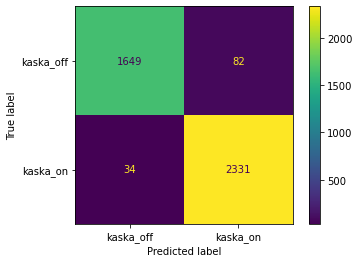

In [18]:
disp.plot()

In [19]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1731
           1       0.97      0.99      0.98      2365

    accuracy                           0.97      4096
   macro avg       0.97      0.97      0.97      4096
weighted avg       0.97      0.97      0.97      4096



In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      